In [ ]:
import hoopin

In [ ]:
data = hoopin.load_data()
data.head(3)

,Unnamed: 0,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,...,TOV,PF,PTS,Age,MOV,Pace,TS%,W,L,Year
0,0,1.0,Cleveland Cavaliers,82,242.4,39.0,83.5,0.468,11.3,30.6,...,15.7,20.4,106.9,25.4,5.38,95.7,0.590,51.0,31.0,2023
1,1,2.0,Miami Heat,82,241.5,40.1,83.2,0.482,13.1,35.8,...,15.7,20.0,109.8,27.7,-0.32,96.3,0.574,44.0,38.0,2023
2,2,3.0,Philadelphia 76ers,82,242.4,40.4,85.4,0.473,11.6,33.4,...,14.3,19.6,110.9,28.2,4.32,96.9,0.608,54.0,28.0,2023


In [ ]:
selected_columns = ['3P%','2P%', 'AST','TRB','STL',"TS%", 'W', 'L']

hoopin.run_regression(selected_columns,data)



Mean Squared Error: 6.284591878260728e-29

Most important variables:
W      1.000000e+00
3P%    5.365335e-13
TS%    1.632655e-13
2P%    1.146860e-13
AST    2.463307e-15
TRB    2.307182e-15
STL    1.956768e-15
L      1.665335e-16
dtype: float64


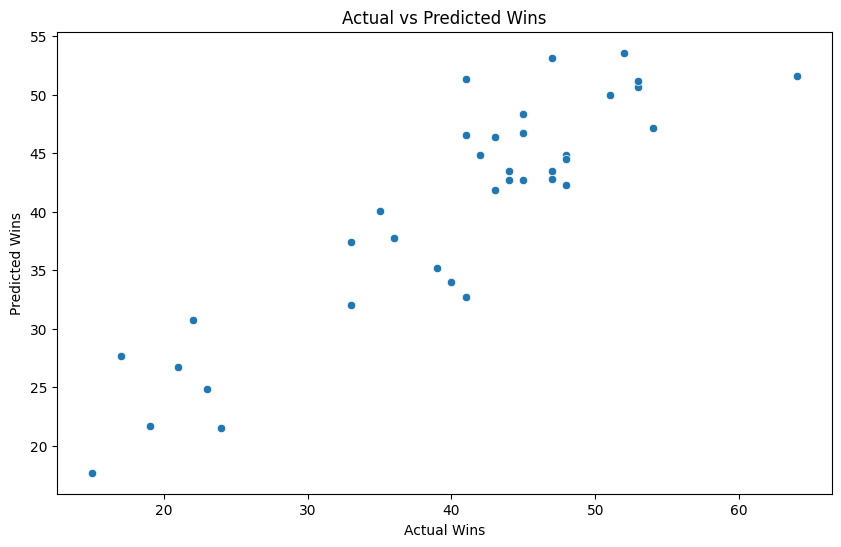

In [ ]:
# show_visualizations()
hoopin.show_actual_predicted()

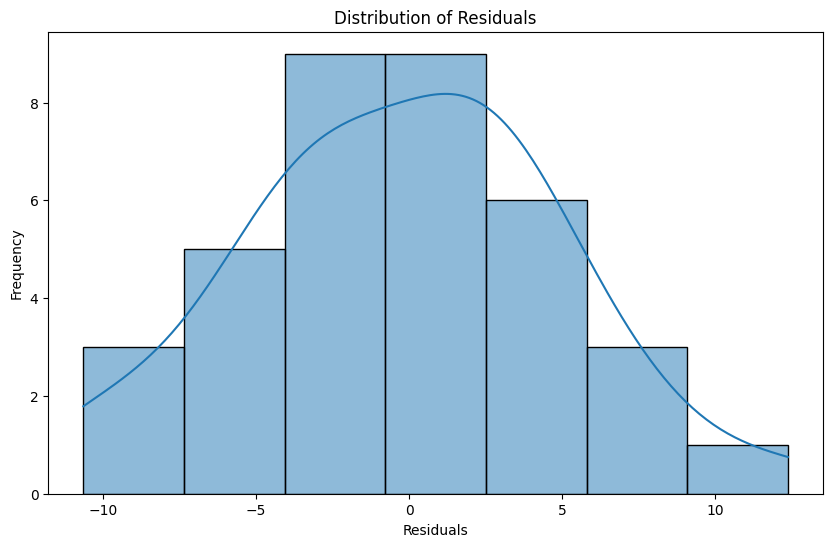

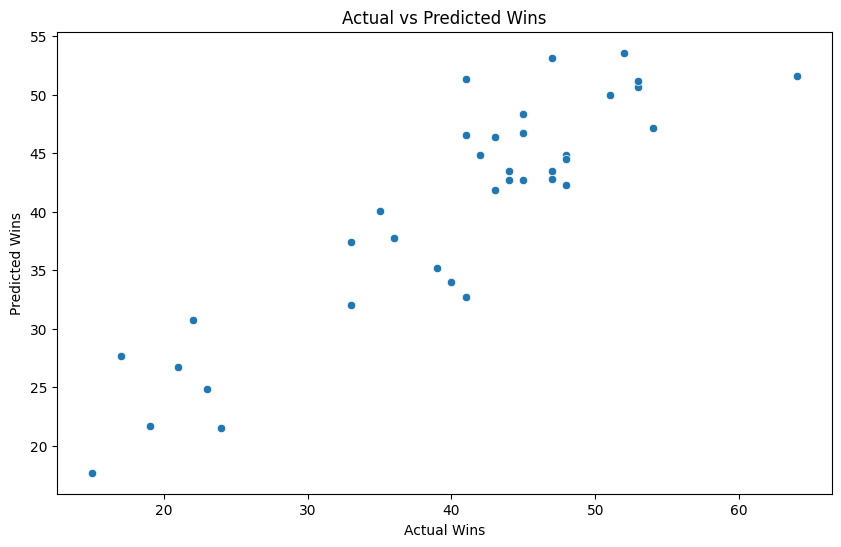

UnboundLocalError: cannot access local variable 'coefficients' where it is not associated with a value

In [8]:
hoopin.show_residuals_distribution()
hoopin.show_actual_predicted()
# hoopin.show_barchart()
hoopin.show_correlation_heatmap()
hoopin.show_pairplot()
hoopin.show_residuals()
hoopin.run_regression()

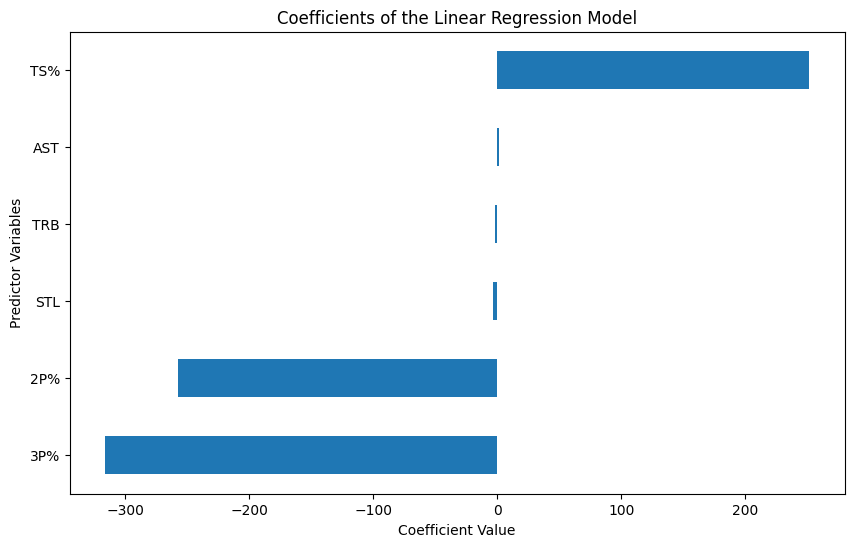

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


all_data_1 =  data

selected_columns = ['3P%','2P%', 'AST','TRB','STL',"TS%", 'W', 'L']


# Split the data into predictor variables (X) and target variable (Y)
X = all_data_1[selected_columns[:-2]]  # All columns except 'W' and 'L'
Y = all_data_1['W']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create a linear regression model, fit it to the training data, and make predictions
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)



coefficients = pd.Series(model.coef_, index=X.columns)
sorted_coefficients = coefficients.abs().sort_values(ascending=False)




# Visualization 2: Bar chart of Coefficients
coefficients = coefficients.sort_values(ascending=True)
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients = coefficients.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh')  # Use 'barh' for horizontal bar chart
plt.title('Coefficients of the Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor Variables')
plt.show()
